<a href="https://colab.research.google.com/github/CrodriguezCode/TalentoTech/blob/main/Regresion_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### 1.1 Modelo lineal
Se trabajará con datos artificialmente generados. Creamos datos basados en la ecuación de una línea recta, luego agregamos ruido y graficamos los datos para tener una visualización de su comportamiento
El ruido que se agrega es de naturaleza Gaussiana, con media cero y desviación estándar de 0.75. Se crean 100 datos para efectos de una visualización adecuada

Text(0.5, 1.0, 'Dataset generado')

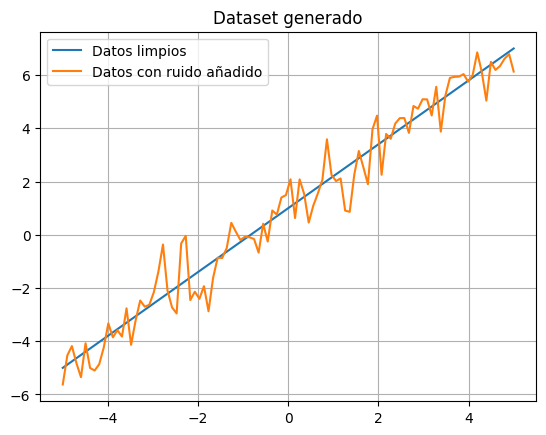

In [ ]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

### 1.2 Creación del modelo
posteriormente se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


In [ ]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.20569109 0.95040953]


Text(0.5, 1.0, 'Modelo de regresión lineal')

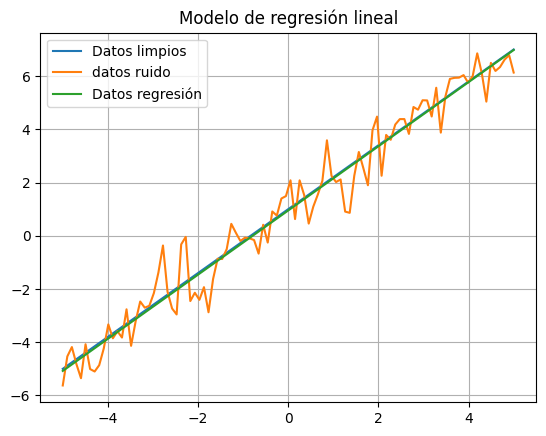

In [ ]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue
### 2.1 Análisis exploratorio de los datos

Se empleará el dataset ice-cream-revenue que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crearán modelos de regresión. El dataset se preprocesará para poder tener datos de evaluación del modelo


In [ ]:
import pandas as pd
import sklearn
import seaborn as sns


In [ ]:
df_helados = pd.read_csv("IceCreamData.csv")
#df_helados.head()
df_helados

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
df_helados.info
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


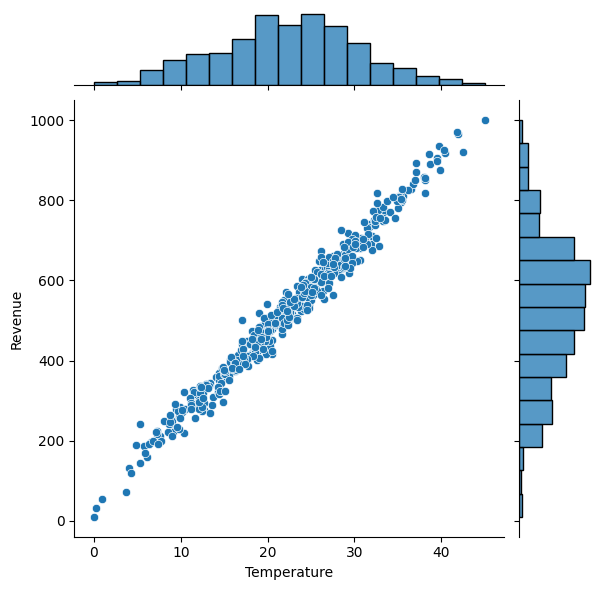

In [ ]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]#deberia estar en minuscula porque es regresion simple (una columna)
                               # pero lo dejaremos con X mayuscula porque trabajermos con mas columnas (regresion multiple)
y = df_helados["Revenue"]#y true

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [ ]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")
m=regressor.coef_
b=regressor.intercept_
print(m,b)

La pendiente del modelo (B) es: [21.47195957], el intersecto (A) es 43.4830683948482
[21.47195957] 43.4830683948482


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

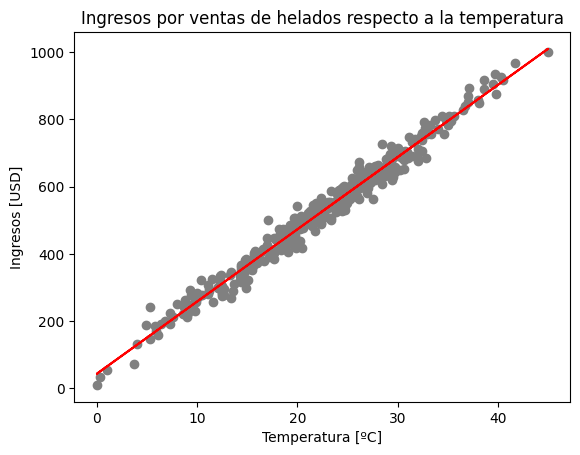

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

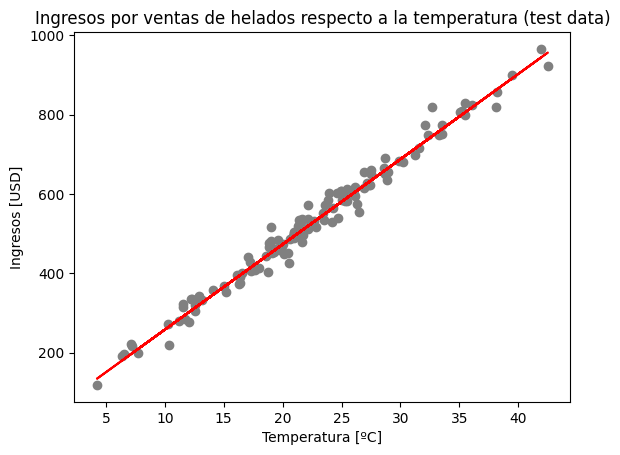

In [ ]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [ ]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
n = len(y_test) #numero de datos
print('El numero de datos es:',n)

print(type(y_test))
print(type(X_test))
y_test = pd.DataFrame(y_test) #Conversion de serie a DataFrame
#print(type(y_test))
#print(type(X_test))

sr = (np.array((np.array(y_test)-(m*np.array(X_test)+b))**2)).sum()/n #formula de Error cuadratico estandar
e_lineal=sr**0.5 #formula de error linela promedio
print('El Error cuadratico estandar mediante formula:',sr)
print('El error lineal promedio mediante formula:',e_lineal)
df_helados

Mean Squared Error: 517.1535091169568
Root Mean Squared Error: 22.741009412885717
El numero de datos es: 125
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
El Error cuadratico estandar mediante formula: 517.1535091169568
El error lineal promedio mediante formula: 22.741009412885717


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
y_test = np.array(y_test)
y_pred = m*np.array(X_test)+b

def calcular_rmse(y_test, y_pred):
  rmse = np.sqrt(((y_test-y_pred)**2).sum()/n)
  return rmse

print("Root Mean Squared Error:",calcular_rmse(y_test, y_pred))

Root Mean Squared Error: 22.741009412885717


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error


## Tarea:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

def get_mean_absolute_error(y_real, y_pred):
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  return mae
```


RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


In [ ]:
# Error medio absoluto == mae (mean_absolute_error)
#mae = (np.array(abs(np.array(y_test)-(m*np.array(X_test)+b)))).sum()/n #formula de error medio absoluto
def error_medio_absoluto(y_test, y_pred):
  mae = (np.abs(y_test-y_pred)).sum()/n
  return mae
print('Error medio absoluto mediante formula:',error_medio_absoluto(y_test, y_pred))

Error medio absoluto mediante formula: 17.37694167465958


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 17.37694167465958


### R cuadrado
Es una medida estadística que indica que tan cerca estan los datos de ajustarse a una línea recta. Se conoce también como el coeficiente de determinación.

In [ ]:
#realizar a mano el R² mediante la formula coeficiente de determinacion - (Consulta)
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9823444347563912


In [ ]:
def coeficiente_determinacion(y_test, y_pred):
    r_cuadrado=1-(np.sum((np.array(y_test)-(m*np.array(X_test)+b))**2)/np.sum((np.array(y_test)-np.mean(y_test))**2))
    return r_cuadrado
print('El coeficiente de determinacion mediante formula:',r_cuadrado)

El coeficiente de determinacion mediante formula: 0.9829963305838609


# Sección 3: regresión polinómica

Se crearán datos sintéticos para realizar la regrresión a un polinomio.


Text(0.5, 1.0, 'Dataset generado')

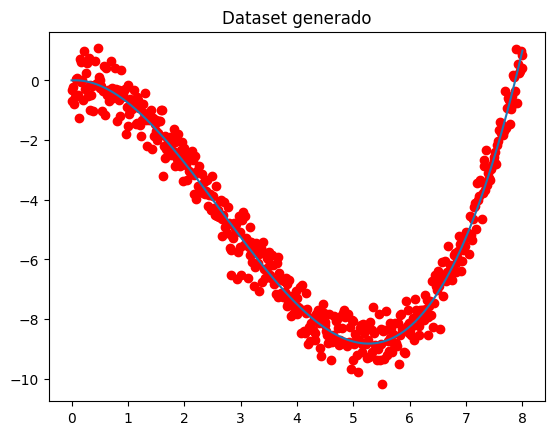

In [ ]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio

**Ejercicio**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores los datos van a tener un mal ajuste y con grados superiores puede existir sobre entrenamiento, por ejemplo de grado 20 se empiezan a notar problemas de ajuste

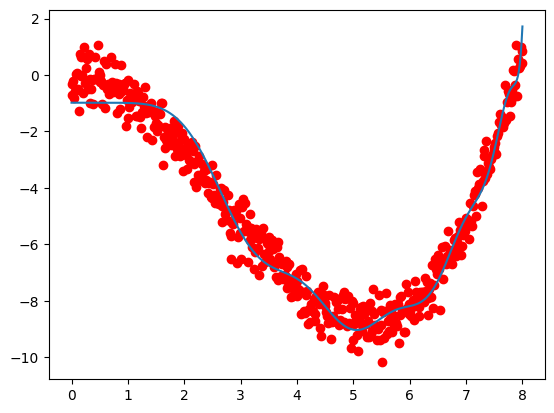

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)




Mean Squared Error: 7.2149658348663905
Root Mean Squared Error: 2.6860688440295775
Mean Absolute Error: 2.232188838349547
R^2: 0.2500119126446534


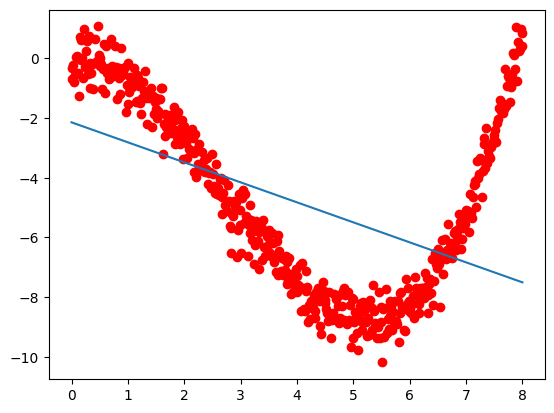

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=1)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data, y_pred))
print("R^2:",r2_score(y_data, y_pred))


Mean Squared Error: 1.4804520580949778
Root Mean Squared Error: 1.216738286606852
Mean Absolute Error: 1.0462446737193913
R^2: 0.8461085703127934


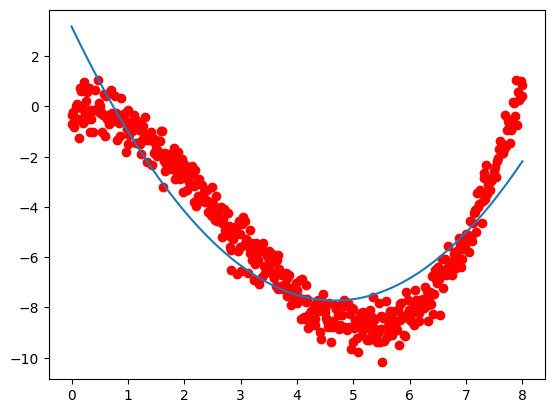

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data, y_pred))
print("R^2:",r2_score(y_data, y_pred))

Mean Squared Error: 9.365101948452178e-29
Root Mean Squared Error: 9.67734568383923e-15
Mean Absolute Error: 9.08989073247768e-15
R^2: 1.0


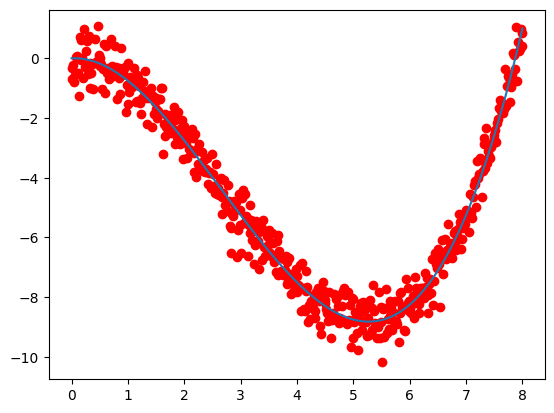

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)

print("Mean Squared Error:",mean_squared_error(y_data, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_data, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_data, y_pred))
print("R^2:",r2_score(y_data, y_pred))